<a href="https://colab.research.google.com/github/DEP04929/ESICMDatathon2026/blob/main/ExploringData_20260112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-requisites for Amsterdam UMC DB


In [48]:
# sets *your* project id
PROJECT_ID = "esicmdatathon2026" #@param {type:"string"}


In [49]:
# sets default dataset for AmsterdamUMCdb
DATASET_PROJECT_ID = 'amsterdamumcdb' #@param {type:"string"}
DATASET_ID = 'van_gogh_2026_datathon' #@param {type:"string"}
LOCATION = 'eu' #@param {type:"string"}

In [50]:
import os
from google.colab import auth

# all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

auth.authenticate_user()
print('Authenticated')


Authenticated


In [51]:
%load_ext google.colab.data_table
from google.colab.data_table import DataTable

# change default limits:
DataTable.max_columns = 50
DataTable.max_rows = 30000


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [52]:
from google.cloud.bigquery import magics
from google.cloud import bigquery

# sets the default query job configuration
def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config


In [53]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns
sns.set_style('darkgrid')

# Exploring data
Am trying to follow :
https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/omop/sql/ddl/bigquery.sql

Ventilator modes appear to be missing. Not possible to find specifics like HFOV for example.

In [ ]:
%%bigquery test --project esicmdatathon2026
select person_id, measurement_datetime, value_as_string, measurement_source_value
from measurement
where measurement_concept_id in (3004921 -- Ventilation mode Ventilator
)
--  and person_id = 51316 -- testing purpose only

Executing query with job ID: f3edb2a3-5700-41f1-8256-1d06e6ec0714
Query executing: 0.43s


ERROR:
 400 Unrecognized name: value_as_string at [1:41]; reason: invalidQuery, location: query, message: Unrecognized name: value_as_string at [1:41]

Location: EU
Job ID: f3edb2a3-5700-41f1-8256-1d06e6ec0714



In [ ]:
test


,person_id,measurement_datetime,value_as_number,measurement_source_value
0,21307,2009-12-31 21:15:00+00:00,NaN,Beademingsmodus;R UMCA AN BEADEMINGSMODUS
1,21307,2009-12-31 21:09:00+00:00,NaN,Beademingsmodus;R UMCA AN BEADEMINGSMODUS
2,21307,2009-12-31 21:07:00+00:00,NaN,Beademingsmodus;R UMCA AN BEADEMINGSMODUS
3,21307,2009-12-31 20:58:00+00:00,NaN,Beademingsmodus;R UMCA AN BEADEMINGSMODUS
4,21307,2009-12-31 21:12:00+00:00,NaN,Beademingsmodus;R UMCA AN BEADEMINGSMODUS
...,...,...,...,...
678,27693,2019-10-30 18:42:00+00:00,NaN,Beademingsmodus;R UMCA BEADEMINGSMODUS
679,10153,2020-02-03 15:23:00+00:00,NaN,Beademingsmodus;R UMCA BEADEMINGSMODUS
680,26860,2022-01-26 16:23:00+00:00,NaN,Modus Hamilton;R UMCA ICU VENTILATOR MODUS HAM...
681,26860,2022-02-01 03:23:00+00:00,NaN,Beademingsmodus;R UMCA BEADEMINGSMODUS


Diagnosis is now condition, and without concepts. Just text based searching.

In [ ]:
%%bigquery test --project esicmdatathon2026
select *
from condition_occurrence
where person_id = 51316 -- 43138

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test


,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,condition_source_value
0,51316,0,2017-01-01,2017-01-01 02:00:00+00:00,NaT,NaT,32879,"Subarachnoid hemorrhage/intracranial aneurysm,..."
1,51316,0,2017-01-01,2017-01-01 02:00:00+00:00,NaT,NaT,32879,Coma/change in level of consciousness (for hep...
2,51316,0,2017-01-23,2017-01-23 16:15:00+00:00,NaT,NaT,32879,Subarachnoid hemorrhage/intracranial aneurysm


It is possible to see modes of non-invasive ventilation

In [ ]:
%%bigquery test --project esicmdatathon2026
select * --person_id, measurement_date, measurement_datetime, value_as_number, value_source_value, measurement_source_value
from measurement
where measurement_concept_id in (2000000250 -- Ventilation mode Ventilator non-invasive
)
  and person_id = 49440 -- testing purpose only
limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test

,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_type_concept_id,value_as_number,measurement_source_value,unit_source_value,value_source_value
0,49440,2000000250,2002-01-22,2002-01-22 21:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
1,49440,2000000250,2002-01-23,2002-01-23 10:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
2,49440,2000000250,2002-01-23,2002-01-23 09:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
3,49440,2000000250,2002-01-23,2002-01-23 13:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
4,49440,2000000250,2002-01-23,2002-01-23 12:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
5,49440,2000000250,2002-01-22,2002-01-22 23:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
6,49440,2000000250,2002-01-23,2002-01-23 05:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
7,49440,2000000250,2002-01-23,2002-01-23 01:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
8,49440,2000000250,2002-01-22,2002-01-22 19:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0
9,49440,2000000250,2002-01-22,2002-01-22 20:11:00+00:00,0,5.0,CPAP (Bipap Vision),cmH2O,5.0


In [ ]:
%%bigquery test --project esicmdatathon2026
select person_id, measurement_date, measurement_datetime, value_as_number, value_source_value, measurement_source_value, unit_source_value
from measurement
where measurement_concept_id in (-- 3043148 --Breath rate mechanical
                                 -- 1175625 -- Breath rate spontaneous
                                 -- 3026892 -- Breath rate spontaneous --on ventilator
                                 3024171 -- Respiratory rate
)
  and value_as_number is not null and value_as_number > 0
--  and person_id = 49440 -- testing purpose only
limit 100


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test


,person_id,measurement_date,measurement_datetime,value_as_number,value_source_value,measurement_source_value,unit_source_value
0,17539,2009-08-29,2009-08-29 16:05:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,
1,17673,2009-12-29,2009-12-29 18:51:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,
2,18103,2009-12-31,2009-12-31 18:18:00+00:00,1.0,1.0,AF totaal;R UMCA AN AF TOTAAL,
3,17509,2009-12-31,2009-12-31 18:26:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,
4,17509,2009-12-31,2009-12-31 18:27:00+00:00,1.0,1.0,AF totaal;R UMCA AN AF TOTAAL,
...,...,...,...,...,...,...,...
95,16631,2016-12-31,2016-12-31 14:00:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,
96,16631,2016-12-31,2016-12-31 14:03:00+00:00,1.0,1.0,AF totaal;R UMCA AN AF TOTAAL,
97,17134,2016-12-31,2016-12-31 14:47:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,
98,17134,2016-12-31,2016-12-31 14:52:00+00:00,1.0,1.0,Respiratory Rate;R RESP RATE,


Quantity is there, but dose is not there, for drug exposure. I am unsure mg/ 24 hours unit meaning?  

In [ ]:
%%bigquery test --project esicmdatathon2026
select * --person_id, drug_exposure_start_datetime, drug_exposure_end_datetime, drug_concept_id, quantity
from drug_exposure
where drug_concept_id in (1736887 -- linezolid
                      ,1709170    -- Meropenem
                      ,1707687    -- vancomycin
                      ,1742253    -- Levofloxacin
                      ,1778162    -- Cefuroxim
                      ,1707164    -- Metronidazol
                      ,1777806    -- Ceftriaxone
                      ,1718054    -- Caspofungin
                      ,1754994    -- Fluconazole
                      ,997881     -- Clindamycin
                      )
      and person_id = 56647 -- testing only
  limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test

,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,drug_type_concept_id,quantity,drug_source_value,route_source_value,dose_unit_source_value
0,56647,1777806,2016-12-30,2016-12-30 20:25:00+00:00,2016-12-30,2016-12-30 20:25:00+00:00,38000180,2000.0,CEFTRIAXON 100 MG/ML INJECTIE,intraveneus,mg
1,56647,1742253,2017-01-08,2017-01-08 14:34:00+00:00,2017-01-08,2017-01-08 14:34:00+00:00,38000180,500.0,LEVOFLOXACINE KORTLOPEND INFUUS,intraveneus,mg
2,56647,1742253,2017-01-09,2017-01-09 00:07:00+00:00,2017-01-09,2017-01-09 00:07:00+00:00,38000180,125.0,LEVOFLOXACINE KORTLOPEND INFUUS,intraveneus,mg
3,56647,1742253,2017-01-09,2017-01-09 11:55:00+00:00,2017-01-09,2017-01-09 11:55:00+00:00,38000180,125.0,LEVOFLOXACINE KORTLOPEND INFUUS,intraveneus,mg
4,56647,1742253,2017-01-10,2017-01-10 00:54:00+00:00,2017-01-10,2017-01-10 00:54:00+00:00,38000180,500.0,LEVOFLOXACINE KORTLOPEND INFUUS,intraveneus,mg
...,...,...,...,...,...,...,...,...,...,...,...
72,56647,1707687,2017-01-10,2017-01-10 22:02:00+00:00,2017-01-10,2017-01-10 22:02:00+00:00,38000180,300.0,VANCOMYCINE INFUUS >250 MG EN <=500 MG IN NACL...,intraveneus,mg
73,56647,1709170,2017-01-11,2017-01-11 10:07:00+00:00,2017-01-11,2017-01-11 10:07:00+00:00,38000180,1000.0,MEROPENEM KORTLOPEND INFUUS IN NACL (VUMC),intraveneus,mg
74,56647,1707687,2017-01-11,2017-01-11 04:33:00+00:00,2017-01-11,2017-01-11 04:33:00+00:00,38000180,1000.0,VANCOMYCINE INFUUS >500 MG EN <=1250 MG IN NAC...,intraveneus,mg
75,56647,1707687,2017-01-28,2017-01-28 05:21:00+00:00,2017-01-28,2017-01-28 05:21:00+00:00,38000180,1000.0,VANCOMYCINE INFUUS >500 MG EN <=1250 MG IN NAC...,intraveneus,mg


Blood labs are in measurements as well.

In [ ]:
%%bigquery test --project esicmdatathon2026
select *
FROM measurement m
  WHERE
    measurement_concept_id in (3018405, 3047181, 3028271, 3005949, 3008037) -- searching for lactate
   and m.person_id = 56647 -- testing purpose, random visit
  limit 100


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test


,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_type_concept_id,value_as_number,measurement_source_value,unit_source_value,value_source_value
0,56647,3008037,2017-02-10,2017-02-10 23:00:00+00:00,0,1.1,BLOEDGAS VOLLEDIG IC PAKKET;LACTAAT VEN. VUMC,mmol/L,1.1
1,56647,3008037,2017-02-15,2017-02-15 23:00:00+00:00,0,1.5,BLOEDGAS VOLLEDIG IC PAKKET;LACTAAT VEN. VUMC,mmol/L,1.5
2,56647,3008037,2017-02-16,2017-02-16 23:00:00+00:00,0,1.9,BLOEDGAS VOLLEDIG IC PAKKET;LACTAAT VEN. VUMC,mmol/L,1.9
3,56647,3008037,2017-01-07,2017-01-07 06:46:00+00:00,0,1.6,LACTAAT (BLOEDGAS);LACTAAT - BLOEDGAS VEN. (AMC),mmol/L,1.6
4,56647,3008037,2016-12-31,2016-12-31 11:49:00+00:00,0,2.1,LACTAAT (BLOEDGAS);LACTAAT - BLOEDGAS VEN. (AMC),mmol/L,2.1
...,...,...,...,...,...,...,...,...,...
95,56647,3018405,2017-01-11,2017-01-11 02:32:00+00:00,0,2.2,LACTAAT POCT;LACTAAT ART. VUMC,mmol/L,2.2
96,56647,3018405,2017-01-12,2017-01-12 14:13:00+00:00,0,1.1,LACTAAT POCT;LACTAAT ART. VUMC,mmol/L,1.1
97,56647,3018405,2017-01-12,2017-01-12 07:18:00+00:00,0,1.1,LACTAAT POCT;LACTAAT ART. VUMC,mmol/L,1.1
98,56647,3018405,2017-01-12,2017-01-12 19:08:00+00:00,0,1.2,LACTAAT POCT;LACTAAT ART. VUMC,mmol/L,1.2


Visits do not have admission from and discharged to

In [ ]:
%%bigquery test --project esicmdatathon2026
select *
FROM visit_occurrence m
where person_id = 56647 -- testing purpose, random visit
  -- and admitted_from_source_value is not null
  limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test

,visit_occurrence_id,person_id,visit_concept_id,visit_start_date,visit_start_datetime,visit_end_date,visit_end_datetime,visit_type_concept_id,visit_source_value,admitted_from_concept_id,discharged_to_concept_id,admitted_from_source_value,discharged_to_source_value
0,25373,56647,9201,2017-01-01,2017-01-01 00:00:00+00:00,2017-01-07,2017-01-07 01:26:00+00:00,32827,icu,0,0,None,None
1,12474,56647,9201,2017-01-07,2017-01-07 11:19:00+00:00,2017-01-10,2017-01-10 06:07:00+00:00,32827,icu,0,0,None,None
2,72438,56647,9201,2017-01-10,2017-01-10 06:53:00+00:00,2017-02-10,2017-02-10 05:15:00+00:00,32827,icu,0,0,None,None
3,45162,56647,9201,2017-02-11,2017-02-11 03:45:00+00:00,2017-02-15,2017-02-15 04:34:00+00:00,32827,icu,0,0,None,None


A person can have multiple visits. The tracheostomy was first found in the second visit in this example.

In [ ]:
%%bigquery test --project esicmdatathon2026
select d.person_id, visit_start_datetime, visit_end_datetime, min(measurement_datetime) as insert_trach
, timestamp_diff( min(measurement_datetime), min(visit_start_datetime),  hour)/24.0 as days_admit_to_first_trach
  from measurement d
inner join visit_occurrence v on d.person_id = v.person_id
       --   and timestamp_diff(v.visit_end_datetime, v.visit_start_datetime, hour )/24.0 >= 2 -- filter for longer patients only
where d.measurement_concept_id in ( 36305611  -- Tracheostomy tube diameter
        )
  and d.person_id = 56647
group by d.person_id, visit_start_datetime, visit_end_datetime


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
test

,person_id,visit_start_datetime,visit_end_datetime,insert_trach,days_admit_to_first_trach
0,56647,2017-01-01 00:00:00+00:00,2017-01-07 01:26:00+00:00,2017-01-09 13:34:00+00:00,8.541667
1,56647,2017-01-07 11:19:00+00:00,2017-01-10 06:07:00+00:00,2017-01-09 13:34:00+00:00,2.083333
2,56647,2017-01-10 06:53:00+00:00,2017-02-10 05:15:00+00:00,2017-01-09 13:34:00+00:00,-0.708333
3,56647,2017-02-11 03:45:00+00:00,2017-02-15 04:34:00+00:00,2017-01-09 13:34:00+00:00,-32.583333


PEEP, FiO2 * co. testing existence of values and frequency of charting.


In [81]:
%%bigquery test_exist_value --project esicmdatathon2026
select measurement_concept_id, c.concept_name, measurement_source_value
, count(*) as number_entries
, count(distinct person_id) as number_patients
, count(distinct cast(person_id as STRING) || cast(measurement_date as STRING)) as number_patient_days
from measurement m inner join concept c on m.measurement_concept_id = c.concept_id
where measurement_concept_id in (
  36305682 -- Bias flow setting Ventilator
  , 3043148 -- Breath rate mechanical --on ventilator
  , 3007469 -- Breath rate setting Ventilator
  , 1175625 -- Breath rate spontaneous
  , 3026892 -- Breath rate spontaneous --on ventilator
  , 40760768 -- Flow trigger setting Ventilator
  , 36305890 -- Inflation trigger pressure setting Ventilator
  , 3009065 -- Inspiration/Expiration setting Ventilator
  , 36304672 -- Inspiratory time setting Ventilator
  , 2000000220 -- Inspiratory time setting Ventilator perc
  , 3045410 -- Minute volume setting Ventilator
  , 3025408 -- Oxygen/Inspired gas Respiratory system by O2 Analyzer --on ventilator
  , 3011557 -- Peak inspiratory gas flow setting Ventilator
  , 3022875 -- Positive end expiratory pressure setting Ventilator
  , 3000461 -- Pressure support setting Ventilator
  , 36306157 -- Pressure.max Respiratory system airway --on ventilator
  , 21490854 -- Tidal volume Ventilator --on ventilator
  , 3012410 -- Tidal volume setting Ventilator
  , 3017594 -- Tidal volume.spontaneous --on ventilator
  , 3017878 -- Tidal volume.spontaneous+mechanical/Body weight [Volume/mass] --on ventilator
  , 21490879 -- Ventilator airway circuit leakage volume
  , 2000000634 -- non-invasive ventilator - leakage fraction
)
--  and person_id = 51316 -- testing purpose only
group by measurement_concept_id, measurement_source_value, concept_name
order by COUNT(*) desc

Query is running:   0%|          |

Downloading:   0%|          |

In [82]:
test_exist_value


,measurement_concept_id,concept_name,measurement_source_value,number_entries,number_patients,number_patient_days
0,3012410,Tidal volume setting Ventilator,TV;R UMCA AN VENT TV,5772125,17058,31216
1,3022875,Positive end expiratory pressure setting Venti...,PEEP/CPAP;R UMCA AN VENT PEEP,5735794,16471,29567
2,36304672,Inspiratory time setting Ventilator,Insp tijd ;R UMCA AN VENT INSPIRATIE TIJD S,4113839,14351,25746
3,36306157,Pressure.max Respiratory system airway --on ve...,P max;R UMCA AN PMAX,3785274,11931,21794
4,3022875,Positive end expiratory pressure setting Venti...,PEEP/CPAP ;R UMCA ICU VENTILATOR PEEP/CPAP SET,2276558,19621,81973
...,...,...,...,...,...,...
74,3000461,Pressure support setting Ventilator,Pcontrol (ingesteld)HA/MA,19,18,19
75,40760768,Flow trigger setting Ventilator,Triggergevoeligheid (Set) (2),10,9,10
76,36305682,Bias flow setting Ventilator,HFO-Bias-flow,3,1,1
77,3007469,Breath rate setting Ventilator,Frequentie ;R UMCA FREQUENTIE CPAP ONGEKOPPELD,3,1,1


In [83]:
%%bigquery test_one_example --project esicmdatathon2026
select measurement_date, measurement_concept_id, concept_name, measurement_source_value, count(value_as_number)
from measurement m inner join concept c on m.measurement_concept_id = c.concept_id
where c.concept_name like '%Breath rate%'
and person_id = 51316 -- testing purpose only, random
group by  measurement_date, measurement_concept_id, concept_name, measurement_source_value
order by measurement_date

Query is running:   0%|          |

Downloading:   0%|          |

In [84]:
test_one_example

# why does one day have both spontaneous and venatilator breathing?
# why is there no entry on 2017-01-04?

,measurement_date,measurement_concept_id,concept_name,measurement_source_value,f0_
0,2017-01-01,1175625,Breath rate spontaneous,AF spont ;R UMCA ICU VENTILATOR RESPIRATORY RA...,22
1,2017-01-01,3007469,Breath rate setting Ventilator,AF totaal;R UMCA ICU VENTILATOR RESPIRATORY RA...,22
2,2017-01-01,3007469,Breath rate setting Ventilator,Ademfrequentie ;R UMCA ICU VENTILATOR RESP RATE S,2
3,2017-01-02,3007469,Breath rate setting Ventilator,AF totaal;R UMCA ICU VENTILATOR RESPIRATORY RA...,24
4,2017-01-02,1175625,Breath rate spontaneous,AF spont ;R UMCA ICU VENTILATOR RESPIRATORY RA...,24
5,2017-01-03,1175625,Breath rate spontaneous,AF spont ;R UMCA ICU VENTILATOR RESPIRATORY RA...,18
6,2017-01-03,3007469,Breath rate setting Ventilator,AF totaal;R UMCA ICU VENTILATOR RESPIRATORY RA...,18
7,2017-01-05,1175625,Breath rate spontaneous,AF spont ;R UMCA ICU VENTILATOR RESPIRATORY RA...,6
8,2017-01-05,3007469,Breath rate setting Ventilator,AF totaal;R UMCA ICU VENTILATOR RESPIRATORY RA...,5
9,2017-01-05,3007469,Breath rate setting Ventilator,Ademfrequentie ;R UMCA ICU VENTILATOR RESP RATE S,3


In [77]:
%%bigquery test_one_example --project esicmdatathon2026
select measurement_date, measurement_source_value, c.concept_name, measurement_concept_id, count(value_as_number)
from measurement m
inner join concept c
on m.measurement_concept_id = c.concept_id
where person_id = 51316 -- testing purpose only, random
  and measurement_date = '2017-01-04'
group by measurement_concept_id, measurement_source_value, c.concept_name, measurement_date
order by count(value_as_number) desc
limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [78]:
test_one_example

,measurement_date,measurement_source_value,concept_name,measurement_concept_id,f0_
0,2017-01-04,intake - Infuus medicatie,Fluid intake intravascular Measured,3037253,52
1,2017-01-04,intake - Infuus,Fluid intake intravascular Measured,3037253,38
2,2017-01-04,T kern (Celsius);R UMCA ICU KERN TEMP (CELSIUS),Body temperature,3020891,24
3,2017-01-04,ST II;R UMCA ICU ST II,ST deviation,3017453,24
4,2017-01-04,HF;R UMCA HF,Heart rate.beat-to-beat by EKG,21490872,24
...,...,...,...,...,...
60,2017-01-04,output - Faeces,Output.stool [Volume],3011087,1
61,2017-01-04,KREATININE;KREATININE AMC,Creatinine [Moles/volume] in Serum or Plasma,3020564,1
62,2017-01-04,GLUCOSE;GLUCOSE,Glucose [Moles/volume] in Blood,3020491,1
63,2017-01-04,KALIUM;KALIUM,Potassium [Moles/volume] in Blood,3005456,1


In [75]:
%%bigquery test --project esicmdatathon2026
select c.concept_name, m.*
from measurement m
inner join concept c
on m.measurement_concept_id = c.concept_id
where person_id = 51316 -- testing purpose only, random
  and measurement_concept_id = 42868484
  and measurement_date = '2017-01-04'
limit 100


Query is running:   0%|          |

Downloading:   0%|          |

In [76]:
test

,concept_name,person_id,measurement_concept_id,measurement_date,measurement_datetime,measurement_type_concept_id,value_as_number,measurement_source_value,unit_source_value,value_source_value
0,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 05:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
1,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 08:41:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
2,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 09:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
3,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 09:30:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
4,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 10:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
5,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 11:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
6,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 12:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
7,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 13:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
8,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 14:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0
9,Type of Positive airway pressure device,51316,42868484,2017-01-04,2017-01-04 15:07:00+00:00,0,10.0,O2 Toedieningssysteem numeric;R O2 TOEDIENINGS...,,10.0


In [56]:
%%bigquery test --project esicmdatathon2026
select *
from observation
where observation_concept_id in (3042082 --Confusion Assessment Method (CAM)
)
limit 100

Query is running:   0%|          |

Downloading:   0%|          |

In [57]:
test

,person_id,observation_concept_id,observation_date,observation_datetime,observation_type_concept_id,value_as_number,observation_source_value,unit_source_value,value_source_value
0,13316,3042082,2006-08-07,2006-08-07 04:33:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
1,13316,3042082,2006-08-07,2006-08-07 04:33:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
2,13316,3042082,2006-08-07,2006-08-07 16:33:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
3,13316,3042082,2006-08-07,2006-08-07 16:33:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
4,57364,3042082,2006-12-10,2006-12-10 05:51:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
...,...,...,...,...,...,...,...,...,...
95,14704,3042082,2007-01-04,2007-01-04 04:27:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
96,14704,3042082,2007-01-04,2007-01-04 16:27:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
97,14704,3042082,2007-01-04,2007-01-04 16:27:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0
98,14704,3042082,2007-01-04,2007-01-04 16:27:00+00:00,0,0.0,CAM-ICU fluctuerend beloop,,0.0


# Heart rate
I want to try something with HRV

In [87]:
%%bigquery test --project esicmdatathon2026
select c.concept_name, max(measurement_date), count(*)
from measurement m
inner join concept c
on m.measurement_concept_id = c.concept_id
where measurement_concept_id in (
  3027018 -- Heart rate
	, 21490670 --Heart rate Intra arterial line by Invasive
	, 3003841 --Heart rate Peripheral artery by palpation
	, 3001376 --Heart rate by Pulse oximetry
	, 3022318 --Heart rate rhythm
	, 3044421 --Heart rate rhythm palpation
	, 21490872 --Heart rate.beat-to-beat by EKG
)
group by concept_name

Query is running:   0%|          |

Downloading:   0%|          |

In [88]:
test


,concept_name,f0_,f1_
0,Heart rate.beat-to-beat by EKG,2023-11-27,9614876
1,Heart rate by Pulse oximetry,2023-12-03,14081859
2,Heart rate rhythm,2023-05-19,2564
3,Heart rate rhythm palpation,2023-01-22,1946
4,Heart rate Intra arterial line by Invasive,2005-09-23,4330
5,Heart rate Peripheral artery by palpation,2023-10-16,5561559
6,Heart rate,2023-08-16,4565653


In [109]:
%%bigquery test --project esicmdatathon2026
select person_id, measurement_date, value_as_number
from measurement m
inner join concept c
on m.measurement_concept_id = c.concept_id
where measurement_concept_id in ( 21490872 --Heart rate.beat-to-beat by EKG
)
and person_id = 44124


Query is running:   0%|          |

Downloading:   0%|          |

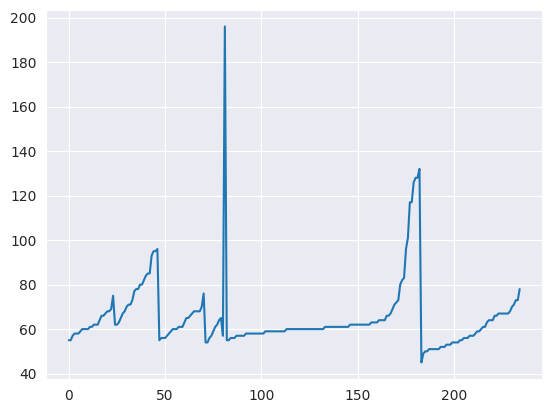

In [123]:
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

df = pd.DataFrame(test)
plt.plot(df['value_as_number'])
